In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
file_path = "Telkom.csv" 
data = pd.read_csv(file_path)

print(data.columns)  
text_column = "Text" 

Index(['conversation_id_str', 'created_at', 'favorite_count', 'Text', 'id_str',
       'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


In [52]:
def clean_text(text):
    stop_words = set(stopwords.words('indonesian'))
    text = text.lower()
    # Menghapus link
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Menghapus tag, hashtag, dan angka
    text = re.sub(r'#\w+|\@\w+|\d+', '', text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus whitespace
    text = ' '.join(text.split())
    text = ''.join([char for char in text if char not in string.punctuation])  # Hapus tanda baca
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Hapus stopwords
    return text

data["cleaned_text"] = data[text_column].apply(clean_text)

In [53]:
vectorizer = TfidfVectorizer(max_features=1000)  
X = vectorizer.fit_transform(data["cleaned_text"])

In [54]:
n_topics = 3  # Jumlah topik
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_result = lsa.fit_transform(X)

In [55]:
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa.components_):
    top_terms = [terms[j] for j in topic.argsort()[-10:][::-1]]  # Ambil 10 kata kunci teratas
    print(f"Topik {i+1}: {', '.join(top_terms)}")

Topik 1: telkom, ya, jaringan, indihome, kak, dm, biar, nomor, internet, nama
Topik 2: telkom, jaringan, indonesia, layanan, sistem, digital, network, spbu, pulih, pt
Topik 3: indihome, signal, wifi, corner, telkomsel, min, ga, jelek, banget, aja


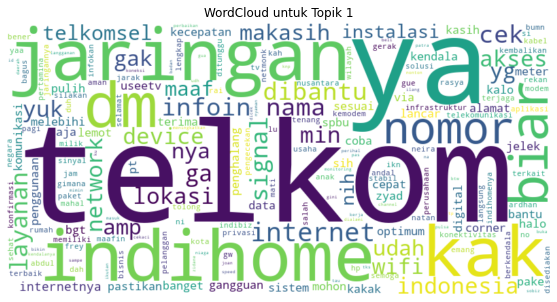

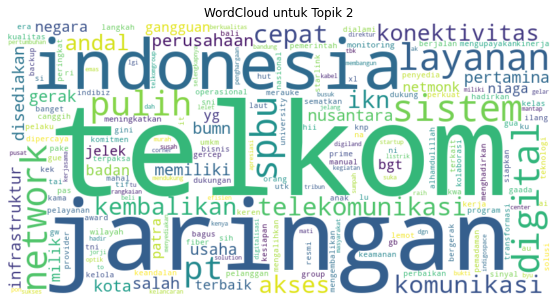

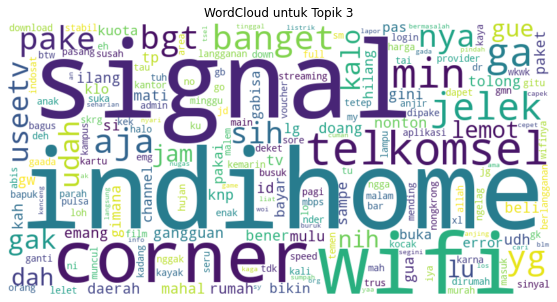

In [56]:
for i, topic in enumerate(lsa.components_):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(
        {terms[j]: topic[j] for j in range(len(terms))}
    )
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud untuk Topik {i+1}")
    plt.show()

In [57]:
explained_variance = lsa.explained_variance_ratio_.sum()
print(f"Proporsi Variansi yang Dijelaskan oleh {n_topics} Topik: {explained_variance:.2f}")

Proporsi Variansi yang Dijelaskan oleh 3 Topik: 0.05


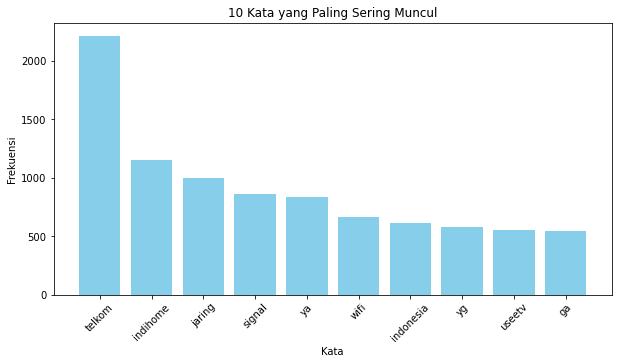

In [60]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from collections import Counter
import matplotlib.pyplot as plt
import re

# Membaca dataset dari file CSV (ganti 'dataset.csv' dengan nama file Anda)
df = pd.read_csv('cleaned_sentiment_analysis.csv')

# Menggabungkan semua teks di kolom 'Text' menjadi satu string besar
text = " ".join(review for review in df['Text'].astype(str))

# Membersihkan teks dari karakter khusus dan menghapus kata-kata umum (stop words) jika diperlukan
cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)

# Memisahkan teks menjadi daftar kata
words = cleaned_text.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Mendapatkan 10 kata yang paling sering muncul
common_words = word_counts.most_common(10)

# Memisahkan kata dan frekuensi untuk visualisasi
words, counts = zip(*common_words)

# Membuat bar plot untuk 10 kata yang paling sering muncul
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('10 Kata yang Paling Sering Muncul')
plt.xticks(rotation=45)
plt.show()